In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("dataset/user_profiles.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    11508 non-null  object 
 1   lang                    11508 non-null  object 
 2   bot                     11508 non-null  int64  
 3   created_at              11508 non-null  object 
 4   statuses_count          11508 non-null  int64  
 5   avg_length              11508 non-null  float64
 6   avg_special_chars       11508 non-null  float64
 7   urls_ratio              11508 non-null  float64
 8   mentions_ratio          11508 non-null  float64
 9   hashtags_ratio          11508 non-null  float64
 10  reply_count_mean        11508 non-null  float64
 11  reply_count_std         11508 non-null  float64
 12  reply_count_entropy     11508 non-null  float64
 13  favorite_count_mean     11508 non-null  float64
 14  favorite_count_std      1

In [4]:
# remove categorical features
cat_features = ["name", "lang", "bot", "created_at"]
df_cat = df[cat_features]
df_num = df.loc[:, ~df.columns.isin(cat_features)]

In [5]:
df_cat.head()

,name,lang,bot,created_at
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56
466124818,Carletto Focia,it,1,2017-01-18 02:49:18
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21


In [6]:
df_num.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
2353593986,76,62.340909,14.015152,0.0,0.272727,0.0,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,1.609438
2358850842,4,69.082645,15.041322,0.0,0.338843,0.0,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,1.098612
137959629,7,19.250000,5.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,50,86.944871,18.689463,0.0,0.004885,0.0,0.0,0.0,0.0,0.130495,0.336848,5.231109,0.150035,1.326298,3.554720
2571493866,8,72.311246,14.582073,0.0,0.448996,0.0,0.0,0.0,0.0,0.053341,0.224712,5.267858,0.016772,0.142619,3.965939


## Preprocessing

In [7]:
scaler = StandardScaler()

In [8]:
X = scaler.fit_transform(df_num.values)

In [9]:
sse_list = list()
max_k = 80
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:29<00:00,  2.64it/s]


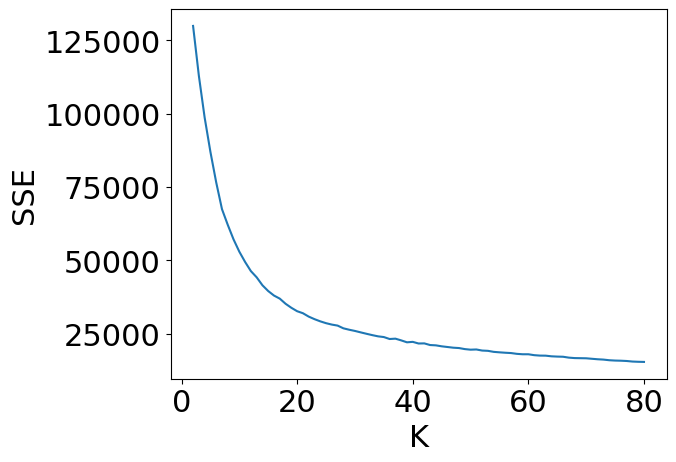

In [10]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [11]:
selected_k = 25

In [12]:
kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=25, n_init=100)

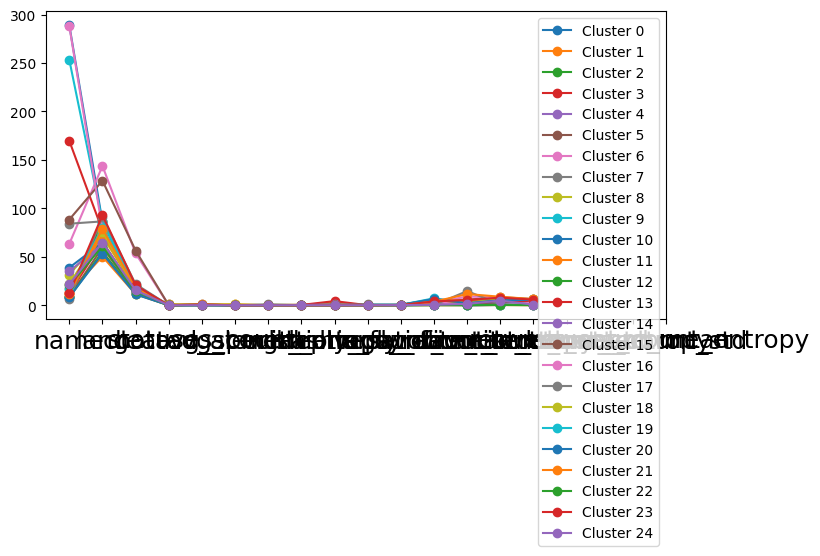

In [13]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

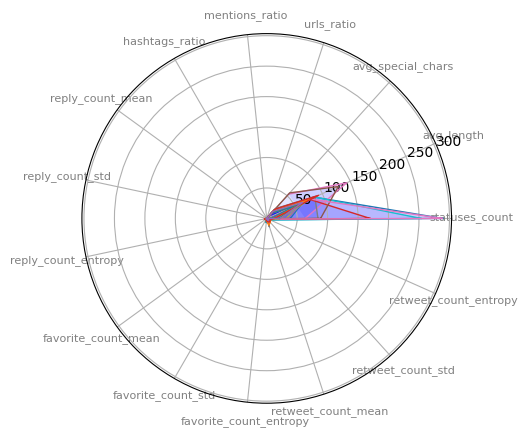

In [14]:
from math import pi
 
# number of variable
N = len(df_num.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df_num.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

In [15]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))


SSE 28578.330420701866
Silhouette 0.38965310354594396
Separation 1.079822271079999


In [16]:
cat_features

['name', 'lang', 'bot', 'created_at']

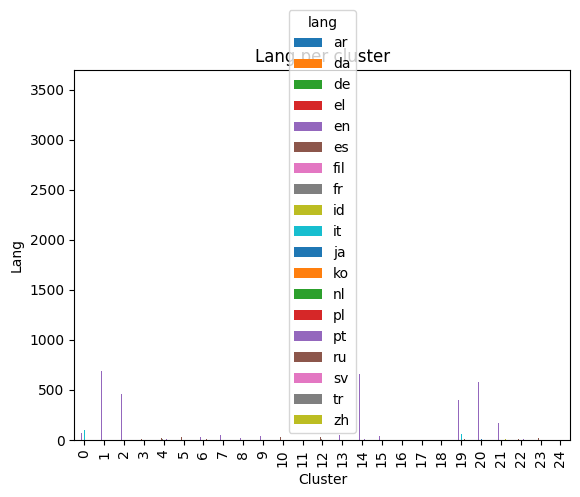

In [17]:
bot_xt_pct = pd.crosstab(kmeans.labels_,df_cat['lang'])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title='Lang per cluster')
plt.xlabel('Cluster')
plt.ylabel('Lang')
plt.show()

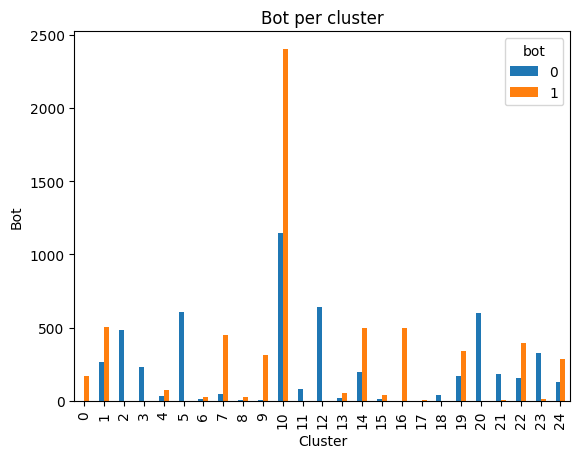

In [18]:
bot_xt_pct = pd.crosstab(kmeans.labels_,df_cat['bot'])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title='Bot per cluster')
plt.xlabel('Cluster')
plt.ylabel('Bot')
plt.show()

## PCA
Apply PCA to visualize the scatter plot distribution of the clustered data

In [19]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

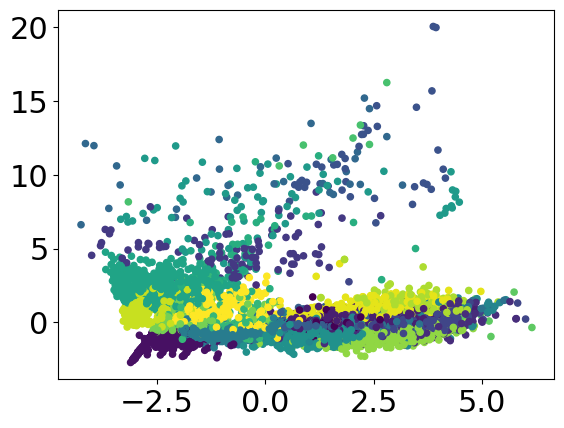

In [20]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()